### we have two different datasets one for binary pattern recognition(normal vs anormaly class) and one for multi-class classification(attack_type)

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#### Binary dataset


In [4]:
df=pd.read_csv("../input/kdddataset/csv_result-KDDTrain.csv",index_col='id')

In [5]:
a=[]
for i in df.columns:
    a.append(i.split("'")[1])
    
df.columns=a

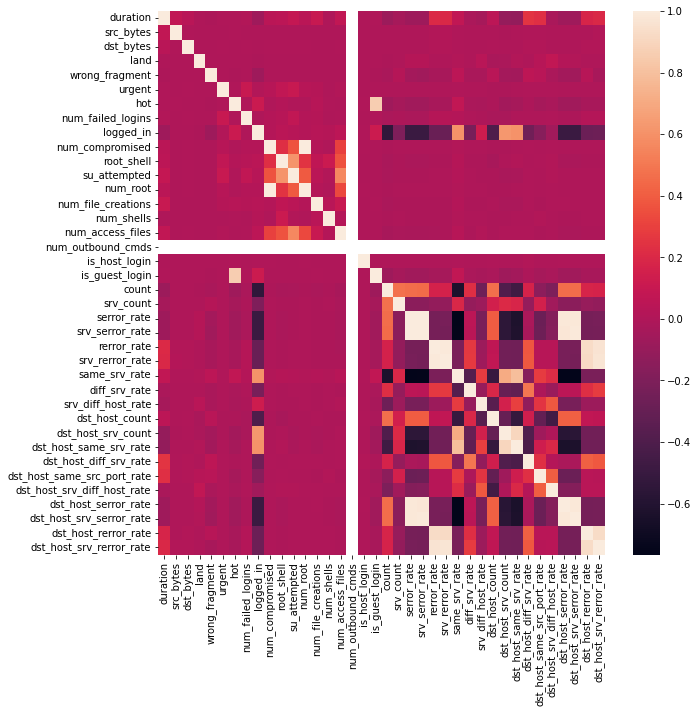

In [6]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr())
plt.show()

<AxesSubplot:xlabel='protocol_type', ylabel='count'>

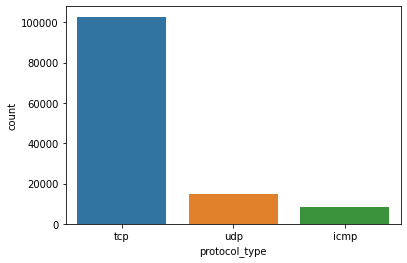

In [7]:
sns.countplot(df['protocol_type'])

<AxesSubplot:xlabel='flag', ylabel='count'>

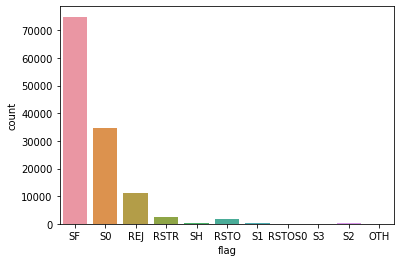

In [8]:
sns.countplot(df.flag)

<AxesSubplot:xlabel='logged_in', ylabel='count'>

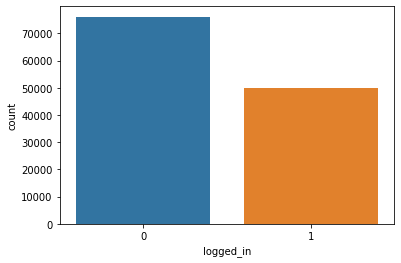

In [9]:
sns.countplot(df.logged_in)

In [10]:
print("mean time(in sec) for anomaly:",df[df['class']=='anomaly']['duration'].mean())
print("mean time(in sec) for normal:",df[df['class']=='normal']['duration'].mean())

mean time(in sec) for anomaly: 423.3206890670305
mean time(in sec) for normal: 168.5873958689099


In [11]:
print("protocol_type distribution in anomaly:",df[df['class']=='anomaly']['protocol_type'].value_counts()/df[df['class']=='anomaly'].shape[0])
print()
print('protocol_type distribution in normal:',df[df['class']=='normal']['protocol_type'].value_counts()/df[df['class']=='normal'].shape[0])

protocol_type distribution in anomaly: tcp     0.837268
icmp    0.119086
udp     0.043647
Name: protocol_type, dtype: float64

protocol_type distribution in normal: tcp     0.795925
udp     0.184637
icmp    0.019438
Name: protocol_type, dtype: float64


In [12]:
df.select_dtypes(exclude=["O"])

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
id,,,,,,,,,,,,,,,,,,,,,
1,0,491,0,0,0,0,0,0,0,0,...,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00
2,0,146,0,0,0,0,0,0,0,0,...,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00
3,0,0,0,0,0,0,0,0,0,0,...,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00
4,0,232,8153,0,0,0,0,0,1,0,...,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01
5,0,199,420,0,0,0,0,0,1,0,...,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125969,0,0,0,0,0,0,0,0,0,0,...,255,25,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00
125970,8,105,145,0,0,0,0,0,0,0,...,255,244,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00
125971,0,2231,384,0,0,0,0,0,1,0,...,255,30,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00


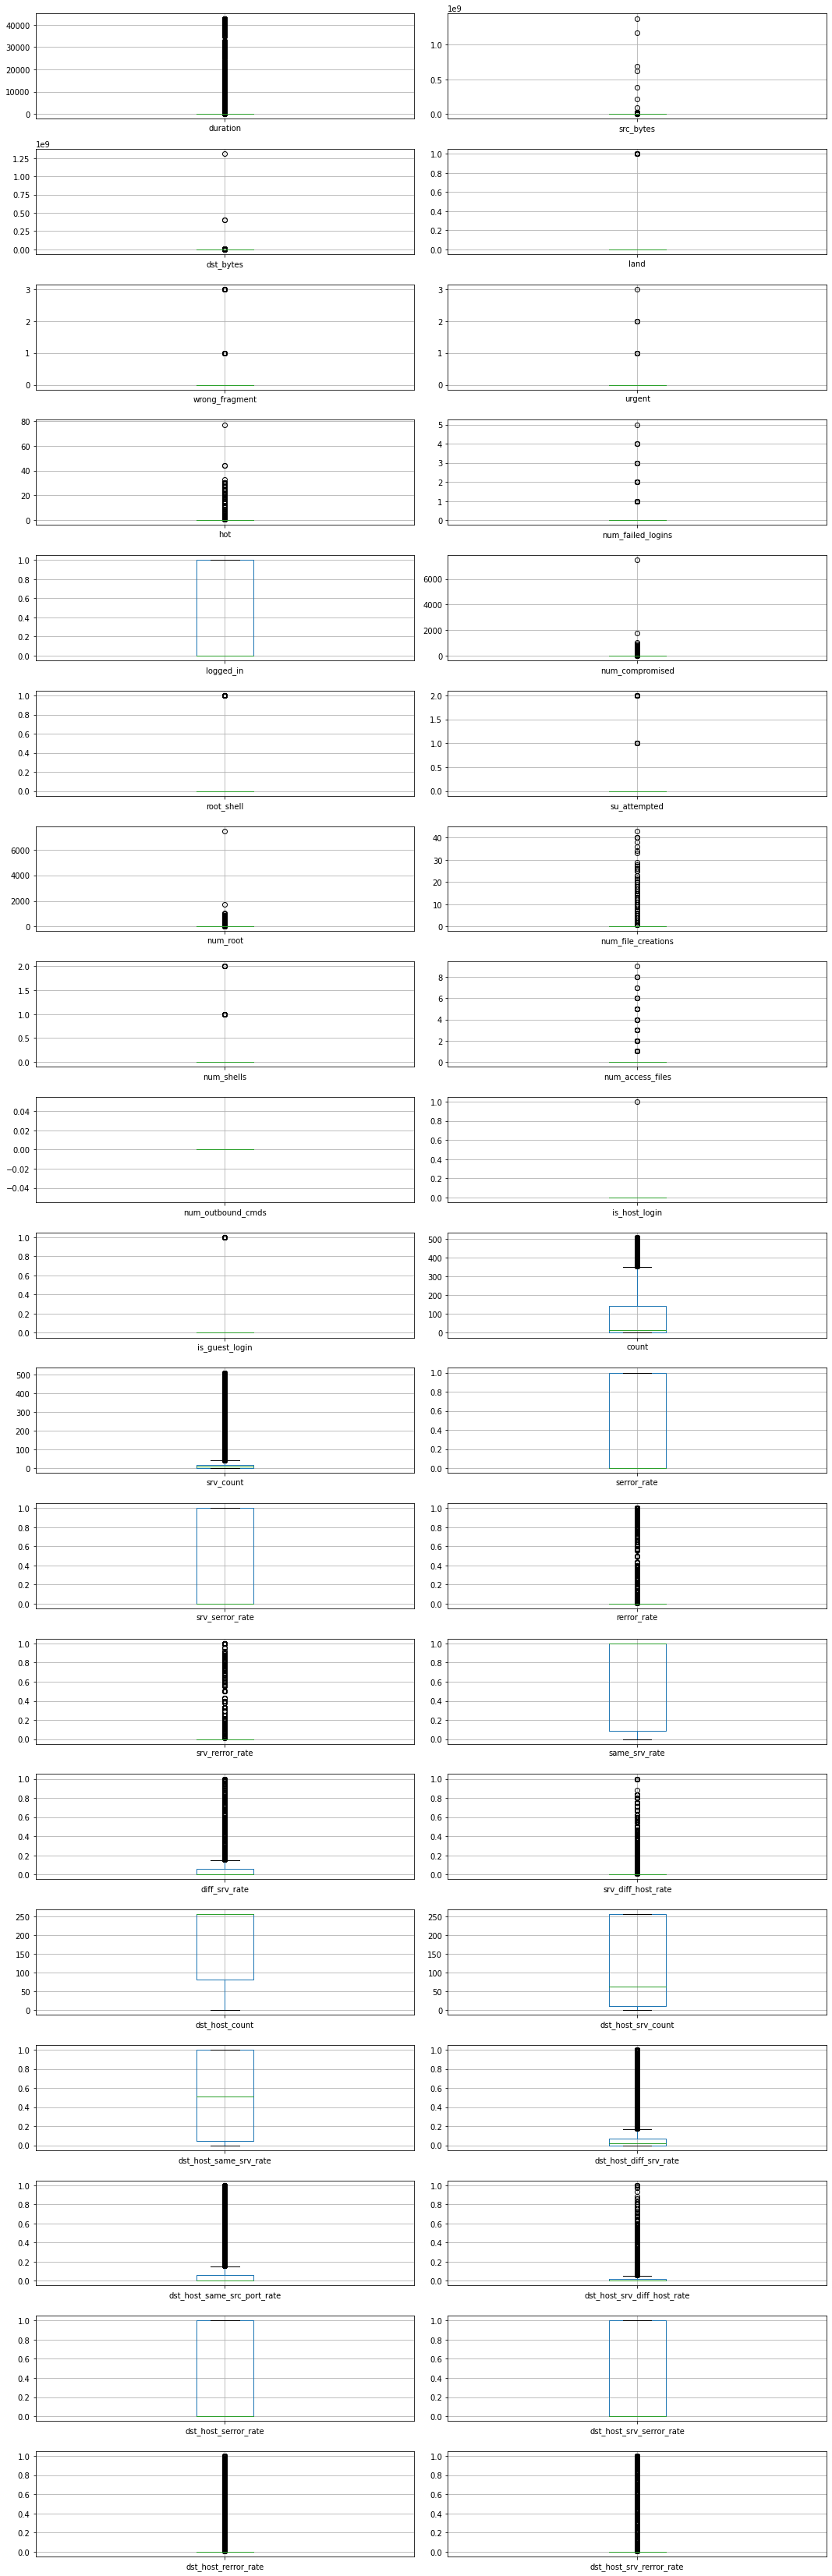

In [13]:
fig,axs=plt.subplots(19,2,figsize=(15,46))
for i,j in enumerate(list(df.select_dtypes(exclude=["O"]).columns)):
    df.boxplot(j,ax=axs.flatten()[i])
    
plt.tight_layout()    

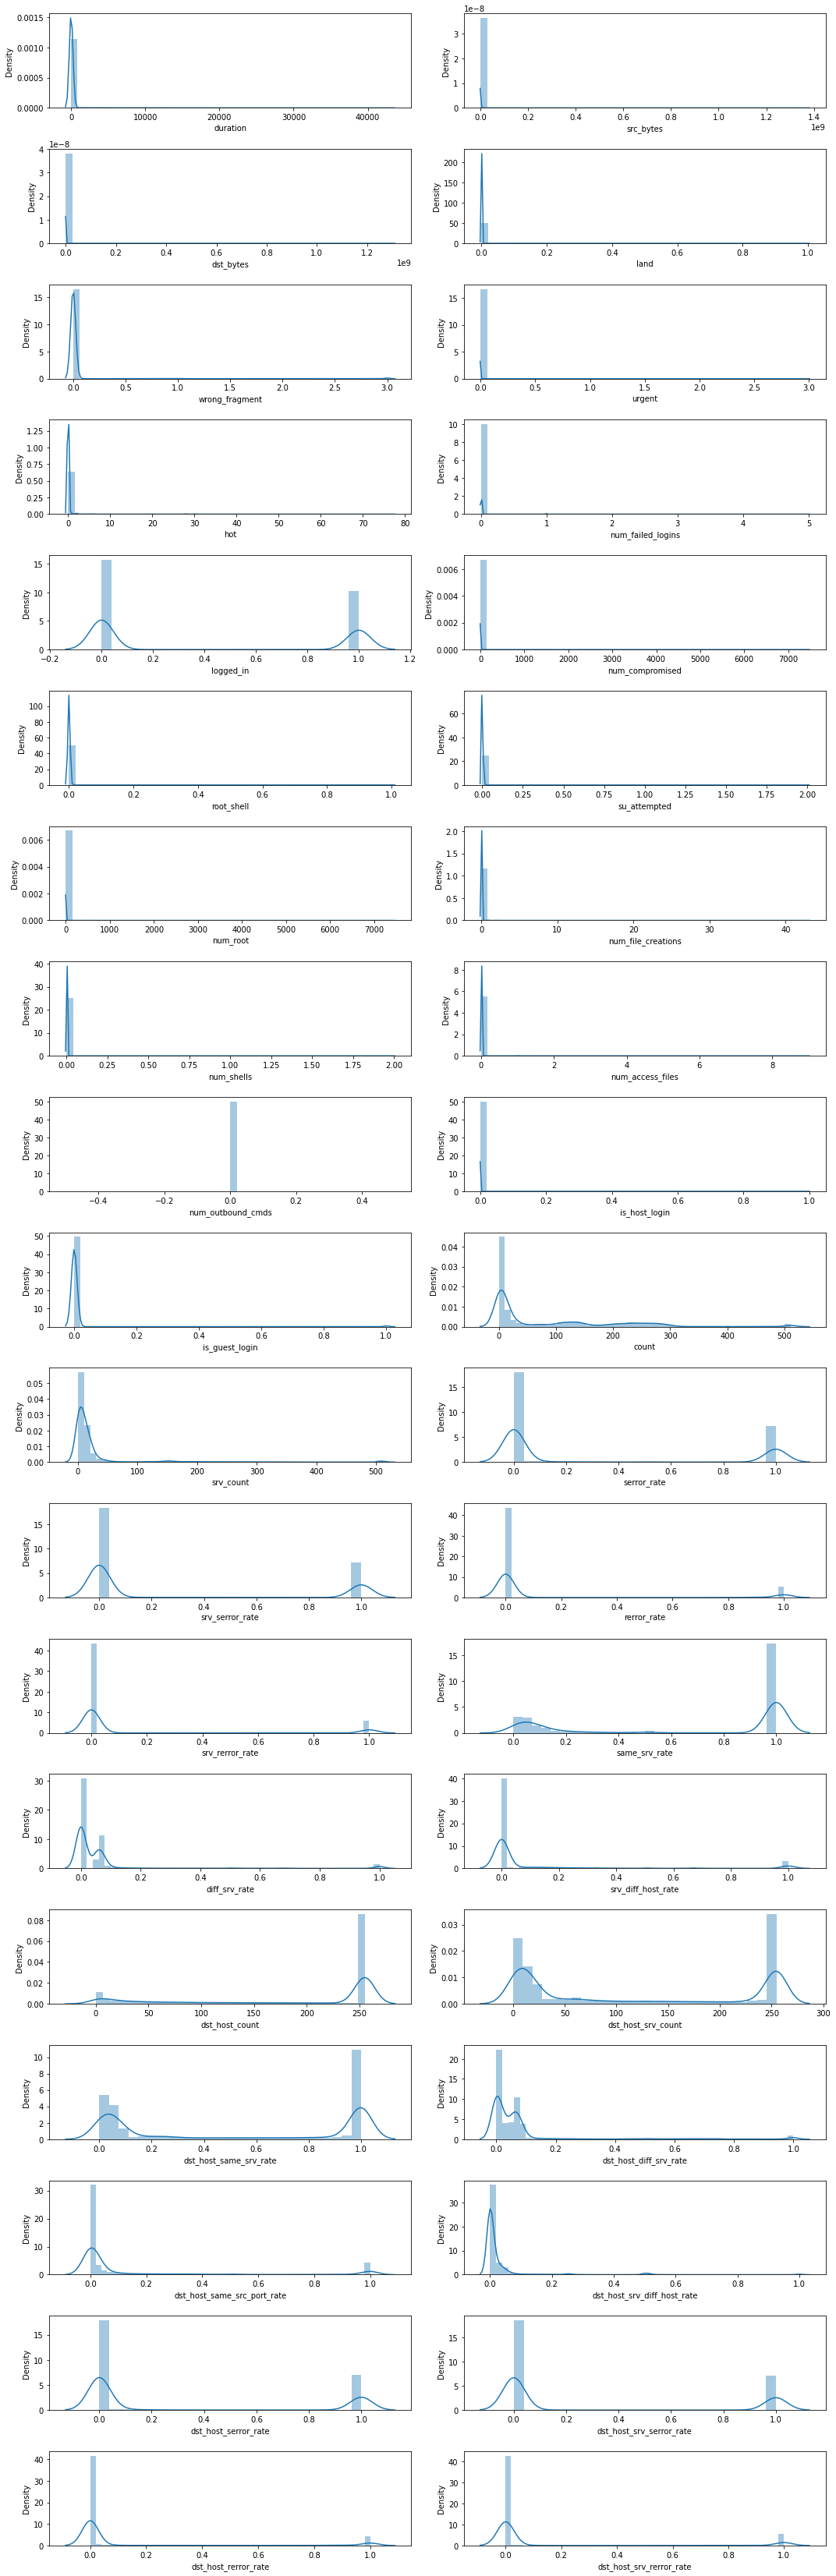

In [14]:
fig,axs=plt.subplots(19,2,figsize=(15,46))
for i,j in enumerate(list(df.select_dtypes(exclude=["O"]).columns)):
    sns.distplot(df[j],ax=axs.flatten()[i])
    
plt.tight_layout()    


In [15]:
df['class']=df['class'].map({'normal':1,'anomaly':0})

#### Multi-labels dataset

In [16]:
df1=pd.read_csv("../input/kdddataset/kdd_train_final.csv")

In [17]:
attacks_types = {
    'normal': 'normal',
'back': 'dos',
'buffer_overflow': 'u2r',
'ftp_write': 'r2l',
'guess_passwd': 'r2l',
'imap': 'r2l',
'ipsweep': 'probe',
'land': 'dos',
'loadmodule': 'u2r',
'multihop': 'r2l',
'neptune': 'dos',
'nmap': 'probe',
'perl': 'u2r',
'phf': 'r2l',
'pod': 'dos',
'portsweep': 'probe',
'rootkit': 'u2r',
'satan': 'probe',
'smurf': 'dos',
'spy': 'r2l',
'teardrop': 'dos',
'warezclient': 'r2l',
'warezmaster': 'r2l',
}

In [18]:
df1.attack_type=df1.attack_type.map(attacks_types)

<AxesSubplot:xlabel='protocol_type', ylabel='count'>

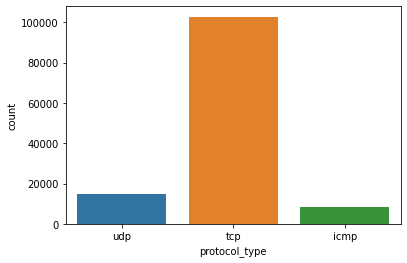

In [19]:
sns.countplot(df1['protocol_type'])

<AxesSubplot:xlabel='flag', ylabel='count'>

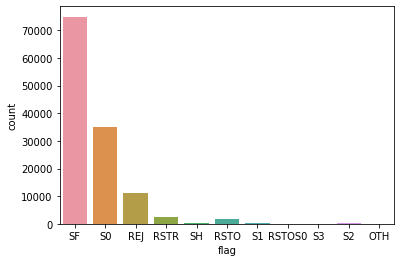

In [20]:
sns.countplot(df1.flag)

<AxesSubplot:xlabel='logged_in', ylabel='count'>

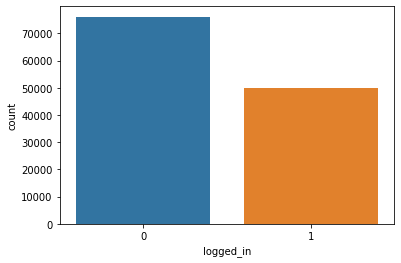

In [21]:
sns.countplot(df1.logged_in)

In [22]:
print("mean time(in sec) for dos attack:",df1[df1['attack_type']=='dos']['duration'].mean())
print("mean time(in sec) for normal attack:",df1[df1['attack_type']=='normal']['duration'].mean())
print("mean time(in sec) for r2l attack:",df1[df1['attack_type']=='r2l']['duration'].mean())
print("mean time(in sec) for probe attack:",df1[df1['attack_type']=='probe']['duration'].mean())
print("mean time(in sec) for u2r attack:",df1[df1['attack_type']=='u2r']['duration'].mean())

mean time(in sec) for dos attack: 0.006227273716985651
mean time(in sec) for normal attack: 168.58989931988953
mean time(in sec) for r2l attack: 633.4170854271357
mean time(in sec) for probe attack: 2074.8581846259435
mean time(in sec) for u2r attack: 80.9423076923077


In [23]:
print("avg. difficulty_level for dos attack:",int(df1[df1['attack_type']=='dos']['difficulty_level'].mean()))
print("avg. difficulty_level  for normal attack:",int(df1[df1['attack_type']=='normal']['difficulty_level'].mean()))
print("avg. difficulty_level  for r2l attack:",int(df1[df1['attack_type']=='r2l']['difficulty_level'].mean()))
print("avg. difficulty_level for probe attack:",int(df1[df1['attack_type']=='probe']['difficulty_level'].mean()))
print("avg. difficulty_level  for u2r attack:",int(df1[df1['attack_type']=='u2r']['difficulty_level'].mean()))

avg. difficulty_level for dos attack: 19
avg. difficulty_level  for normal attack: 20
avg. difficulty_level  for r2l attack: 9
avg. difficulty_level for probe attack: 16
avg. difficulty_level  for u2r attack: 4


In [24]:
df1.select_dtypes(exclude="O")

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,difficulty_level
0,0,146,0,0,0,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,15
1,0,0,0,0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,19
2,0,232,8153,0,0,0,0,0,1,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,21
3,0,199,420,0,0,0,0,0,1,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,21
4,0,0,0,0,0,0,0,0,0,0,...,19,0.07,0.07,0.00,0.00,0.00,0.00,1.00,1.00,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125967,0,0,0,0,0,0,0,0,0,0,...,25,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,20
125968,8,105,145,0,0,0,0,0,0,0,...,244,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,21
125969,0,2231,384,0,0,0,0,0,1,0,...,30,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,18
125970,0,0,0,0,0,0,0,0,0,0,...,8,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,20


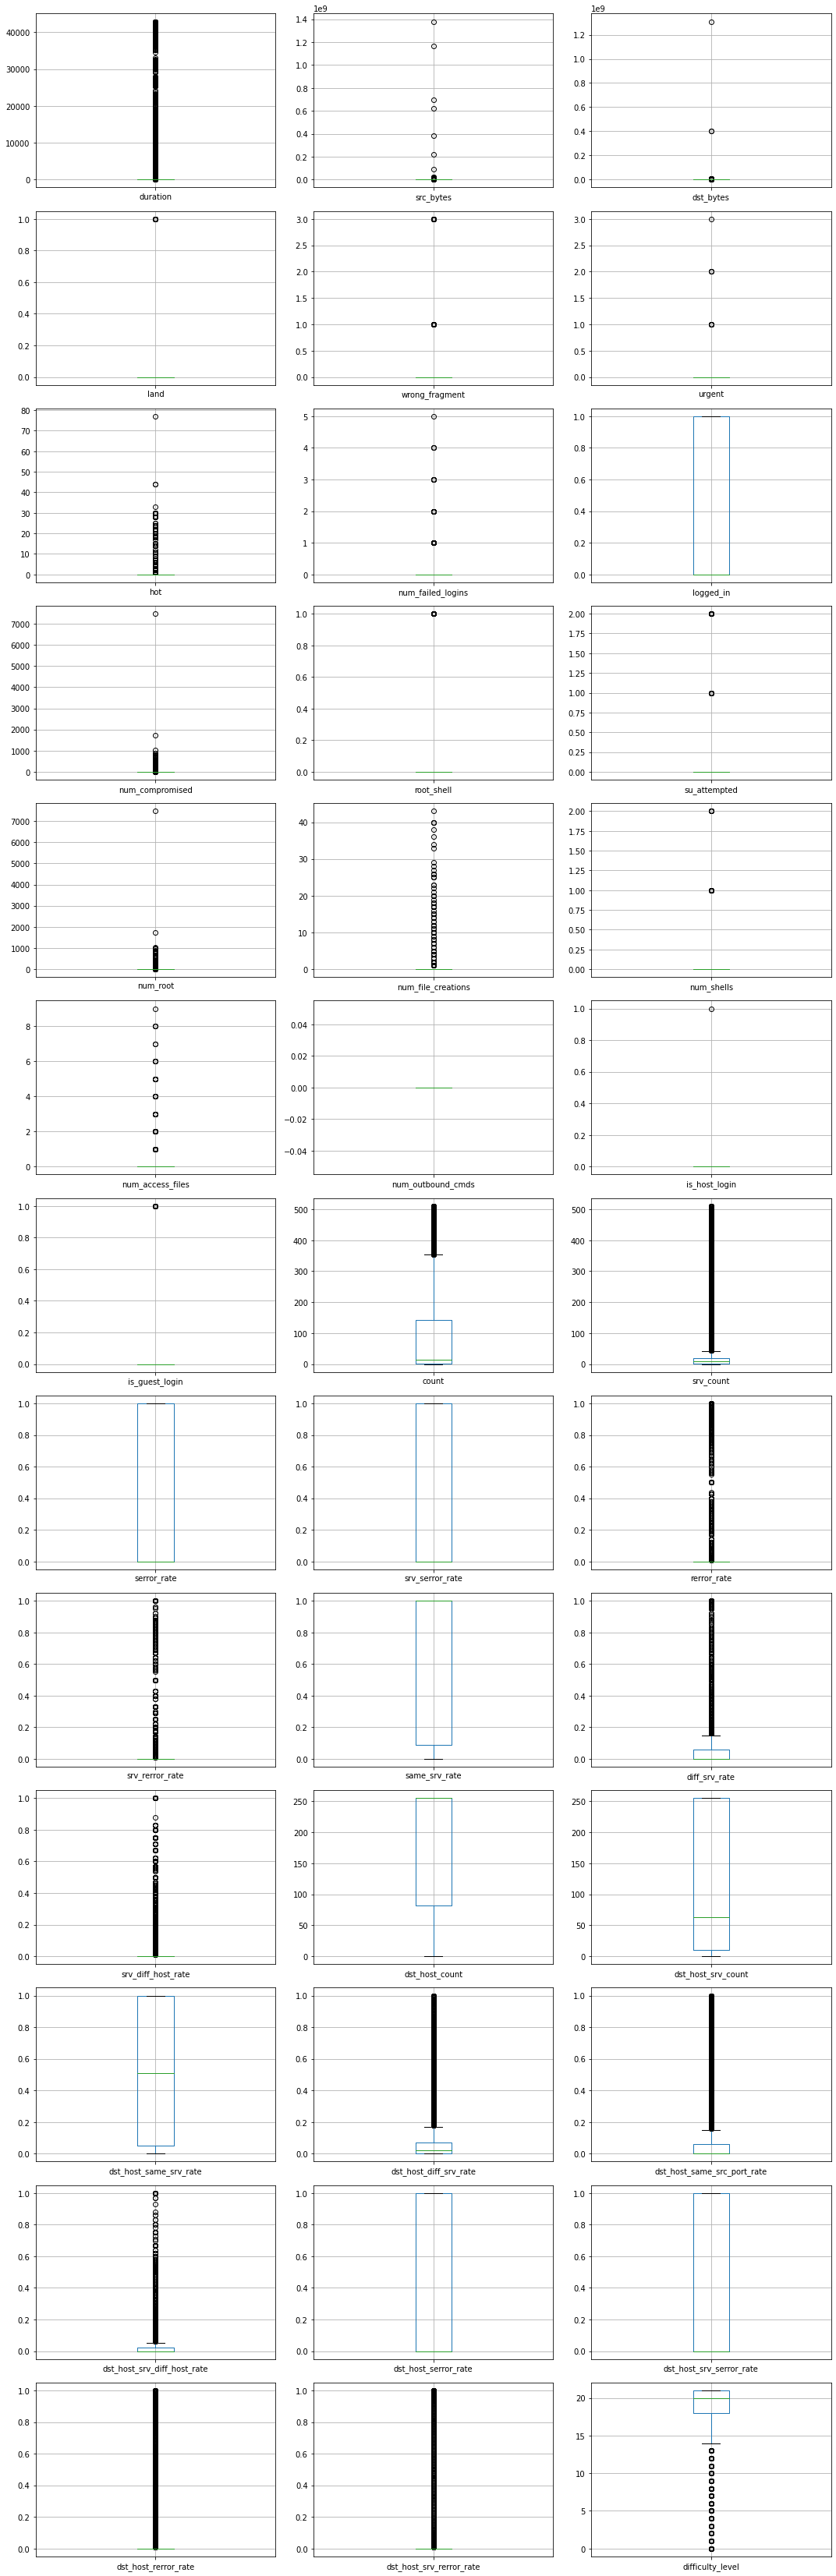

In [25]:
fig,axs=plt.subplots(13,3,figsize=(15,46))
for i,j in enumerate(list(df1.select_dtypes(exclude=["O"]).columns)):
    df1.boxplot(j,ax=axs.flatten()[i])
    
plt.tight_layout()    

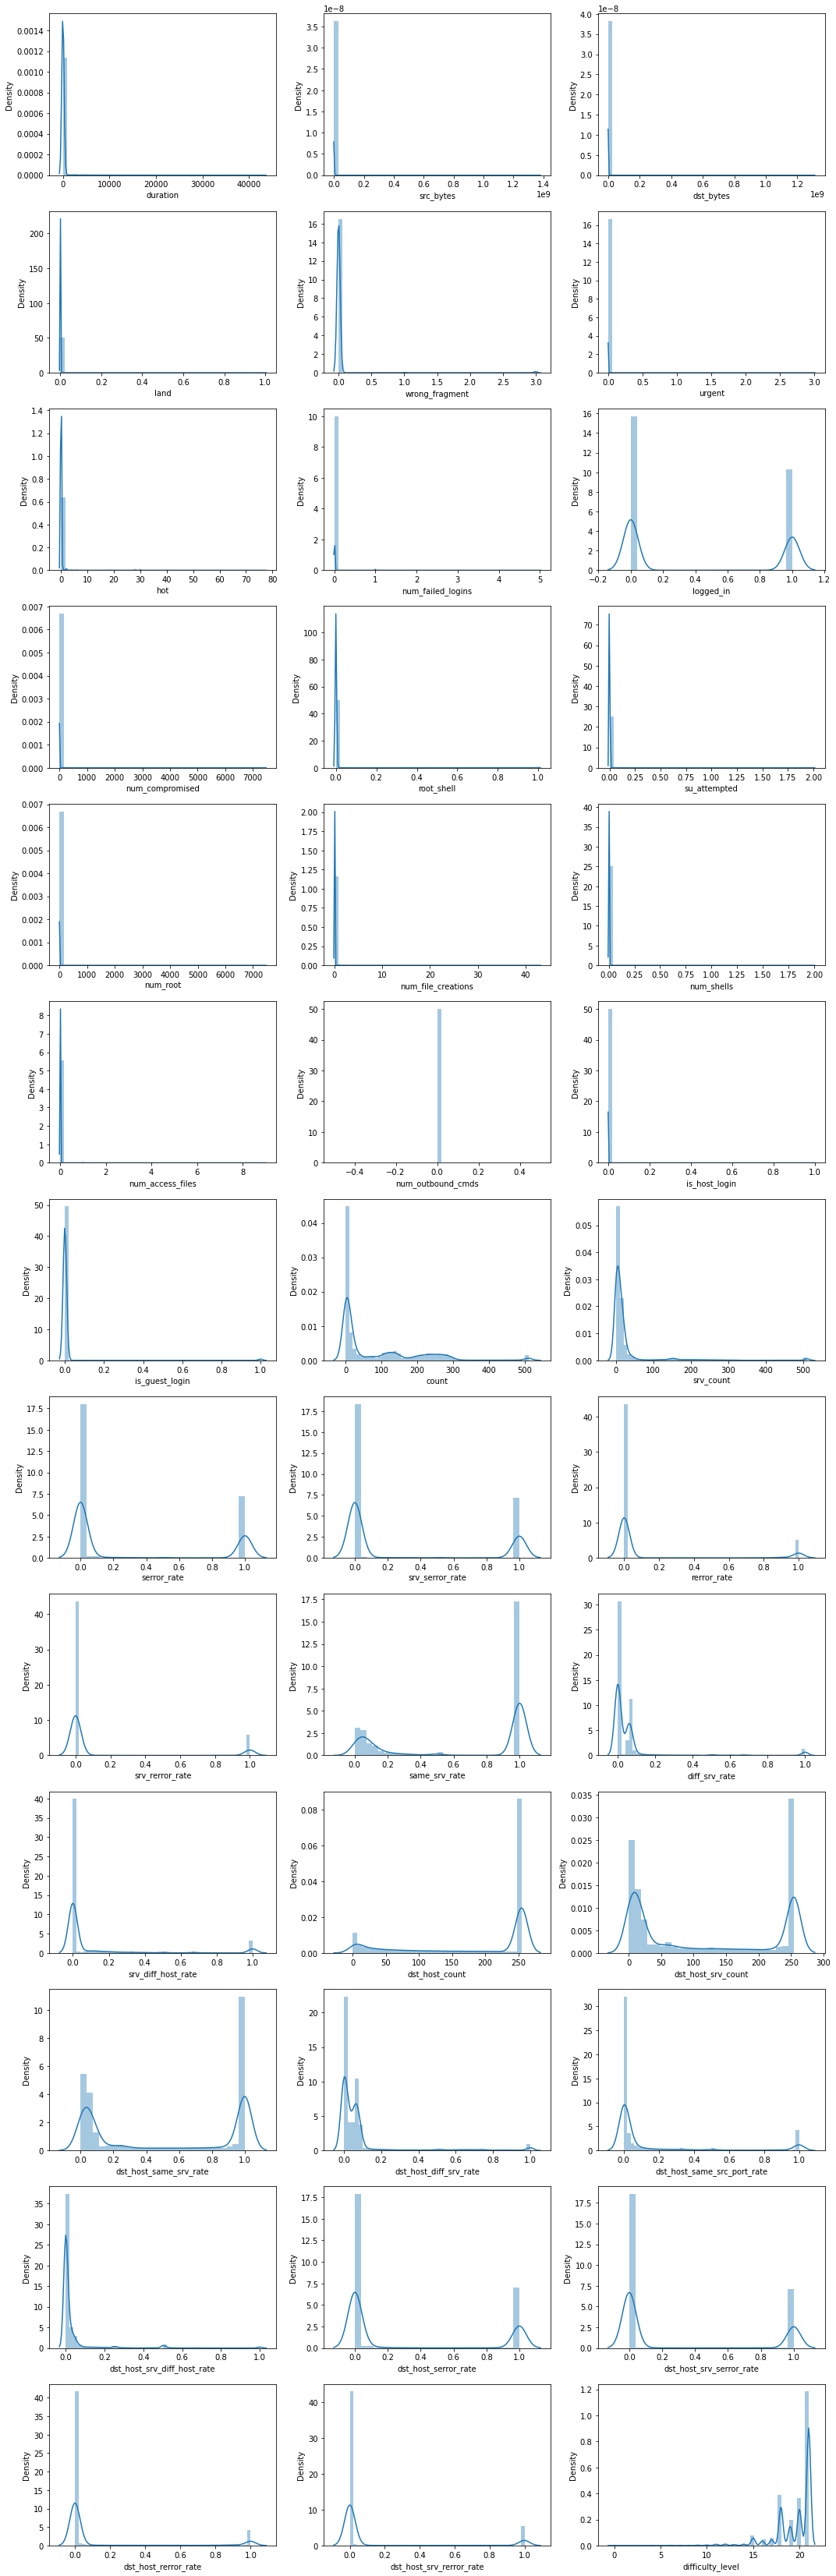

In [26]:
fig,axs=plt.subplots(13,3,figsize=(15,46))
for i,j in enumerate(list(df1.select_dtypes(exclude=["O"]).columns)):
    sns.distplot(df1[j],ax=axs.flatten()[i])
    
plt.tight_layout()    


In [27]:
df1['attack_type']=df1['attack_type'].map({'normal':0,'dos':1,'probe':2,"r2l":3,"u2r":4})

In [28]:
df['class']

id
1         1
2         1
3         0
4         1
5         1
         ..
125969    0
125970    1
125971    1
125972    0
125973    1
Name: class, Length: 125973, dtype: int64

<AxesSubplot:>

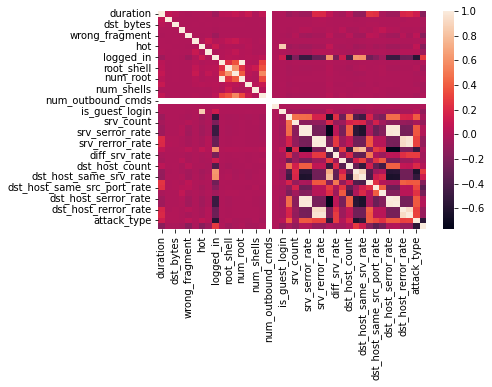

In [29]:
sns.heatmap(df1.corr())